In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Cesarean normalized.csv')

In [2]:
data.head()

,AGE,HEIGHT,WEIGHT,BMI,KG INCREASED PREGNANCY,NUMBER OF PREV CESAREAN,PREVIOUS TERM PREGNANCIES,PREVIOUS PRETERM PREGNANCIES,MISCARRIAGES,ALIVE NEW BORNS,...,GROUP_ group 2a,GROUP_ group 2b,GROUP_ group 3,GROUP_ group 4a,GROUP_ group 4b,GROUP_ group 5,GROUP_ group 6,GROUP_ group 7,GROUP_ group 8,GROUP_ group 9
0,0.285714,0.009758,0.378698,0.417272,0.673469,0.0,0.0,0.0,0.090909,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.285714,0.009212,0.372781,0.460875,0.612245,0.0,0.0,0.0,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0.457143,0.010182,0.402367,0.407132,0.632653,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.685714,0.009091,0.295858,0.375528,0.448980,0.0,0.0,0.0,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0.600000,0.010000,0.431953,0.453101,0.755102,0.0,0.0,0.0,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
X = data.drop(['TYPE OF BIRTH    '], axis = 1)
Y = data['TYPE OF BIRTH    ']

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

#set the regularization parameter C = 1

logistic = LogisticRegression(C=1, penalty="l1", solver = 'liblinear', random_state=7).fit(X,Y)
model = SelectFromModel(logistic, prefit=True)

X_new = pd.DataFrame(model.transform(X))

selected_columns = X_new.columns[X_new.var()!=0]

selected_columns

#X_new

C:\Users\mahmu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40],
           dtype='int64')

In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector
ffs = SequentialFeatureSelector()

TypeError: __init__() missing 1 required positional argument: 'estimator'

In [54]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [55]:
feature = pd.DataFrame(forward_selection(X,Y))

<ipython-input-54-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-54-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-54-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-54-66a4d2c172be>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


In [56]:
feature.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       29 non-null     object
dtypes: object(1)
memory usage: 360.0+ bytes


In [57]:
feature

,0
0,Fetal INTRAPARTUM pH
1,EPISIOTOMY
2,GROUP_ group 3
3,GROUP_ group 1
4,ANESTHESIA
5,GROUP_ group 4a
6,AGE
7,COMPLICATIONS
8,COMORBIDITY
9,MATERNAL EDUCATION_ secondary


In [ ]:
'''['AGE', 'WEIGHT', 'BMI', 'KG INCREASED PREGNANCY', 'PREVIOUS TERM PREGNANCIES','PARITY', 'GESTAGIONAL AGE ', 'COUPLE SITUATION ', 'ART', 'AMNIOCENTESIS', 'PREVIOUS CESAREAN',
       'COMORBIDITY', 'PREINDUCTION', 'INDUCTION',
       'ANESTHESIA ', 'EPISIOTOMY', 'Fetal INTRAPARTUM pH', 'COMPLICATIONS',
        'LIQUID_ Hemorr�gico  ',
       'LIQUID_ clear        ', 'LIQUID_ stained +    ',
       'LIQUID_ stained ++   ', 'LIQUID_ stained +++  ', 'GROUP_ group 1     ',
       'GROUP_ group 10    ', 'GROUP_ group 2a    ', 'GROUP_ group 2b    ',
       'GROUP_ group 3     ', 'GROUP_ group 4a    ', 'GROUP_ group 4b    ',
       'GROUP_ group 5     ', 'GROUP_ group 6     ', 'GROUP_ group 7     ',
       'GROUP_ group 8     ', 'GROUP_ group 9     ']'''

In [ ]:
from sklearn import ensemble
#from sklearn.ensemble import RandomForestClassfier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(ensemble.RandomForestClassifier(n_estimators = 100))
sel.fit(X, Y)

sel.get_support()


In [ ]:
selected_feat= X.columns[(sel.get_support())]
len(selected_feat)

In [ ]:
print(selected_feat)

In [ ]:
pd.Series(sel.estimator_,feature_importances_,ravel()).hist()

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
feature = pd.DataFrame(backward_elimination(X,Y))

In [ ]:
feature

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [ ]:
feature = pd.DataFrame(stepwise_selection(X,Y))

In [ ]:
feature

In [ ]:
['AGE', 'WEIGHT', 'BMI', 'KG INCREASED PREGNANCY', 'PREVIOUS TERM PREGNANCIES','PARITY', 'GESTAGIONAL AGE ', 'COUPLE SITUATION ', 'SUBSTANCE ABUSE',
       'SMOKING', 'ALCOHOL', 'ART', 'AMNIOCENTESIS', 'PREVIOUS CESAREAN',
       'COMORBIDITY', 'OBSTETRIC RISK', 'PREINDUCTION', 'INDUCTION',
       'ANESTHESIA ', 'EPISIOTOMY', 'Fetal INTRAPARTUM pH', 'COMPLICATIONS',
       'MATERNAL EDUCATION_ primary        ',
       'MATERNAL EDUCATION_ secondary      ',
       'MATERNAL EDUCATION_ university   ', 'MATERNAL EDUCATION_No study',
       'CARRE_ 1� Trimester             ', 'CARRE_ 2� Trimester             ',
       'CARRE_ 3� Trimester             ', 'CARRE_ Desconocido              ',
       'CARDIOTOCOGRAPHY  _ NO           ',
       'CARDIOTOCOGRAPHY  _ continuous     ',
       'CARDIOTOCOGRAPHY  _ discontinuous ', 'LIQUID_ Hemorr�gico  ',
       'LIQUID_ clear        ', 'LIQUID_ stained +    ',
       'LIQUID_ stained ++   ', 'LIQUID_ stained +++  ', 'GROUP_ group 1     ',
       'GROUP_ group 10    ', 'GROUP_ group 2a    ', 'GROUP_ group 2b    ',
       'GROUP_ group 3     ', 'GROUP_ group 4a    ', 'GROUP_ group 4b    ',
       'GROUP_ group 5     ', 'GROUP_ group 6     ', 'GROUP_ group 7     ',
       'GROUP_ group 8     ', 'GROUP_ group 9     ']

### Mutual Information Gain

<AxesSubplot:>

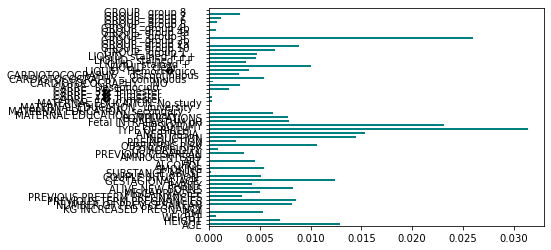

In [7]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,Y)
feat_importance = pd.Series(importance, data.columns[0: len(data.columns)-1])
feat_importance.plot(kind='barh', color='teal')

In [11]:
feat_importance.sort_values(ascending=False)

TYPE OF BIRTH                          0.031416
GROUP_ group 2b                        0.025957
EPISIOTOMY                             0.023151
ANESTHESIA                             0.015397
INDUCTION                              0.014493
AGE                                    0.012884
GESTAGIONAL AGE                        0.012359
OBSTETRIC RISK                         0.010660
LIQUID_ clear                          0.010014
GROUP_ group 10                        0.008876
PREVIOUS TERM PREGNANCIES              0.008544
ALIVE NEW BORNS                        0.008213
NUMBER OF PREV CESAREAN                0.008142
Fetal INTRAPARTUM pH                   0.007866
COMPLICATIONS                          0.007726
HEIGHT                                 0.006932
GROUP_ group 1                         0.006465
MATERNAL EDUCATION_ primary            0.006281
CARDIOTOCOGRAPHY  _ continuous         0.005365
SMOKING                                0.005354
BMI                                    0

### Lasso Regression

In [16]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.]])

In [19]:
from sklearn import linear_model
regressor = linear_model.Lasso(alpha=100,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
regressor.fit(X,Y)

Lasso(alpha=100, fit_intercept=False, positive=True)

In [21]:
import eli5
eli5.show_weights(regressor, top=-1, feature_names = x_train.columns.tolist())

ModuleNotFoundError: No module named 'eli5'

In [22]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.12932173 0.10357891 0.08750379 0.07053934 0.06135573 0.05079936
 0.04811608 0.04424074 0.03942694 0.03486583 0.03379816 0.03077869
 0.02840485 0.02420839 0.0217917  0.02130505 0.02084152 0.01826476
 0.01643459 0.01568244]
[[ 7.23222853e-03  2.01477106e-04  8.93528061e-03 ...  3.25482485e-03
   2.96307965e-03  6.33613136e-04]
 [-1.71750375e-02 -2.55423633e-04  1.50955153e-04 ... -4.14071365e-03
   1.42995074e-03  9.03138845e-04]
 [-5.22485984e-02 -2.02424724e-04 -2.13534240e-02 ...  2.69340182e-03
  -9.52800351e-04  1.33760812e-04]
 ...
 [ 1.70561385e-01 -3.63949878e-04  9.86461015e-04 ...  2.88073461e-02
   5.74113739e-03  1.25130051e-03]
 [-7.40291693e-03 -2.74884378e-04  4.81114927e-03 ...  5.67274661e-02
   1.03226545e-02  8.07823501e-03]
 [-9.80415853e-03  4.67639938e-05  9.30333193e-03 ...  5.19471232e-03
   4.50275158e-03 -6.37533242e-04]]


### Random Forest

In [23]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X, Y)
#rfc.fit(x_train_smt, y_train_smt)

feature_importance = pd.Series(rfc.feature_importances_, index= X.columns)
feature_importance.sort_values(ascending=False)


BMI                                    0.088644
WEIGHT                                 0.076364
HEIGHT                                 0.075107
AGE                                    0.075104
EPISIOTOMY                             0.073263
KG INCREASED PREGNANCY                 0.072525
GESTAGIONAL AGE                        0.057211
Fetal INTRAPARTUM pH                   0.054038
PARITY                                 0.038399
MISCARRIAGES                           0.020099
ANESTHESIA                             0.019101
INDUCTION                              0.018929
OBSTETRIC RISK                         0.018481
COMORBIDITY                            0.016949
GROUP_ group 3                         0.016461
MATERNAL EDUCATION_ secondary          0.016168
PREINDUCTION                           0.014600
ALIVE NEW BORNS                        0.014254
PREVIOUS TERM PREGNANCIES              0.013981
NUMBER OF PREV CESAREAN                0.013176
GROUP_ group 6                         0

<AxesSubplot:>

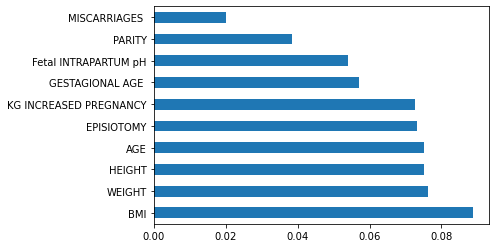

In [24]:
feature_importance.nlargest(10).plot(kind='barh')


### PCA

In [44]:
X

,AGE,HEIGHT,WEIGHT,BMI,KG INCREASED PREGNANCY,NUMBER OF PREV CESAREAN,PREVIOUS TERM PREGNANCIES,PREVIOUS PRETERM PREGNANCIES,MISCARRIAGES,ALIVE NEW BORNS,...,GROUP_ group 2a,GROUP_ group 2b,GROUP_ group 3,GROUP_ group 4a,GROUP_ group 4b,GROUP_ group 5,GROUP_ group 6,GROUP_ group 7,GROUP_ group 8,GROUP_ group 9
0,0.285714,0.009758,0.378698,0.417272,0.673469,0.000000,0.0,0.0,0.090909,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.285714,0.009212,0.372781,0.460875,0.612245,0.000000,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
2,0.457143,0.010182,0.402367,0.407132,0.632653,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.685714,0.009091,0.295858,0.375528,0.448980,0.000000,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
4,0.600000,0.010000,0.431953,0.453101,0.755102,0.000000,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,0.714286,0.010364,0.436686,0.426568,0.510204,0.000000,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
6153,0.371429,0.010424,0.550296,0.531350,0.653061,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
6154,0.571429,0.009455,0.317160,0.372148,0.571429,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
6155,0.571429,0.009818,0.319527,0.347811,0.530612,0.333333,0.1,0.0,0.000000,0.142857,...,0,0,1,0,0,0,0,0,0,0


In [40]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 55)
 
#apply PCA to transform the features to 2
X_pca = pca.fit_transform(X)

X_pca
 
#create the new dataframe
df_pca = pd.DataFrame(X_pca)

In [41]:
df_pca 

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.232516,0.702381,1.034843,0.282829,-0.476764,0.584218,-0.100166,-0.267605,0.071095,-0.412849,...,0.008170,-0.001905,-0.006521,-0.002356,0.000553,-9.590962e-15,-7.845582e-16,3.350240e-16,1.770270e-15,-1.546284e-16
1,0.944963,0.914622,-0.177764,0.030764,-0.207162,0.773055,0.242440,-0.200796,0.119312,-0.603130,...,0.037798,-0.004004,-0.008057,0.003337,0.003389,2.578949e-15,-7.060780e-17,1.646589e-16,2.729417e-17,-1.039375e-16
2,-0.094683,0.415059,1.266882,0.354556,0.754297,0.119048,-0.103577,-0.203155,-0.065804,-0.280921,...,-0.007689,0.000896,0.001135,0.001691,0.000100,-1.506121e-15,-1.618539e-16,2.849181e-16,-2.130467e-16,-7.360719e-17
3,1.080348,0.627152,0.043871,0.110167,1.046631,0.303075,0.242665,-0.140732,-0.015981,-0.458907,...,0.034219,-0.005522,-0.010524,0.002721,0.002452,8.501023e-16,-3.276343e-16,-2.327675e-17,1.078943e-17,8.892270e-17
4,1.118506,0.705461,0.388197,-0.684102,0.911641,0.374119,0.849274,0.257253,0.360427,-0.048077,...,0.008491,-0.001901,0.009668,-0.000137,-0.001517,5.447714e-17,1.443795e-17,-4.479046e-17,-1.193489e-15,-9.291681e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,1.015174,0.599665,0.248035,-0.530840,1.232591,0.787395,0.026290,-0.121025,-0.054259,-0.118289,...,-0.023717,0.001600,0.001039,0.001776,-0.001328,-2.860259e-17,-3.072661e-17,-3.113919e-17,-2.261337e-17,1.975705e-17
6153,0.926108,-0.463058,-0.079436,0.283830,-0.010776,0.355766,0.104191,-0.060613,-0.066736,-0.425159,...,-0.018572,0.010257,0.008430,0.003228,-0.000745,-1.613243e-16,-3.113175e-17,-9.541886e-18,-3.808029e-17,2.220873e-17
6154,-0.346775,0.381960,1.034732,0.248826,0.791721,0.025068,-0.382069,0.297940,0.234922,-0.629046,...,0.024467,-0.002667,-0.003648,0.002533,0.000312,-7.851853e-17,-3.903679e-17,1.085348e-17,1.075759e-17,1.841221e-17
6155,0.025526,0.389343,-0.337663,1.058654,0.912426,-0.008299,0.576077,-0.493121,-0.255392,-0.274471,...,-0.011969,-0.015185,-0.007543,0.004050,0.000584,-2.402808e-16,-4.000673e-17,-6.177541e-17,-5.275694e-17,3.187552e-17


In [29]:
columns = X.columns

X.shape

(6157, 55)

In [42]:

df_pca.columns=columns

In [43]:
df_pca

,AGE,HEIGHT,WEIGHT,BMI,KG INCREASED PREGNANCY,NUMBER OF PREV CESAREAN,PREVIOUS TERM PREGNANCIES,PREVIOUS PRETERM PREGNANCIES,MISCARRIAGES,ALIVE NEW BORNS,...,GROUP_ group 2a,GROUP_ group 2b,GROUP_ group 3,GROUP_ group 4a,GROUP_ group 4b,GROUP_ group 5,GROUP_ group 6,GROUP_ group 7,GROUP_ group 8,GROUP_ group 9
0,-0.232516,0.702381,1.034843,0.282829,-0.476764,0.584218,-0.100166,-0.267605,0.071095,-0.412849,...,0.008170,-0.001905,-0.006521,-0.002356,0.000553,-9.590962e-15,-7.845582e-16,3.350240e-16,1.770270e-15,-1.546284e-16
1,0.944963,0.914622,-0.177764,0.030764,-0.207162,0.773055,0.242440,-0.200796,0.119312,-0.603130,...,0.037798,-0.004004,-0.008057,0.003337,0.003389,2.578949e-15,-7.060780e-17,1.646589e-16,2.729417e-17,-1.039375e-16
2,-0.094683,0.415059,1.266882,0.354556,0.754297,0.119048,-0.103577,-0.203155,-0.065804,-0.280921,...,-0.007689,0.000896,0.001135,0.001691,0.000100,-1.506121e-15,-1.618539e-16,2.849181e-16,-2.130467e-16,-7.360719e-17
3,1.080348,0.627152,0.043871,0.110167,1.046631,0.303075,0.242665,-0.140732,-0.015981,-0.458907,...,0.034219,-0.005522,-0.010524,0.002721,0.002452,8.501023e-16,-3.276343e-16,-2.327675e-17,1.078943e-17,8.892270e-17
4,1.118506,0.705461,0.388197,-0.684102,0.911641,0.374119,0.849274,0.257253,0.360427,-0.048077,...,0.008491,-0.001901,0.009668,-0.000137,-0.001517,5.447714e-17,1.443795e-17,-4.479046e-17,-1.193489e-15,-9.291681e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,1.015174,0.599665,0.248035,-0.530840,1.232591,0.787395,0.026290,-0.121025,-0.054259,-0.118289,...,-0.023717,0.001600,0.001039,0.001776,-0.001328,-2.860259e-17,-3.072661e-17,-3.113919e-17,-2.261337e-17,1.975705e-17
6153,0.926108,-0.463058,-0.079436,0.283830,-0.010776,0.355766,0.104191,-0.060613,-0.066736,-0.425159,...,-0.018572,0.010257,0.008430,0.003228,-0.000745,-1.613243e-16,-3.113175e-17,-9.541886e-18,-3.808029e-17,2.220873e-17
6154,-0.346775,0.381960,1.034732,0.248826,0.791721,0.025068,-0.382069,0.297940,0.234922,-0.629046,...,0.024467,-0.002667,-0.003648,0.002533,0.000312,-7.851853e-17,-3.903679e-17,1.085348e-17,1.075759e-17,1.841221e-17
6155,0.025526,0.389343,-0.337663,1.058654,0.912426,-0.008299,0.576077,-0.493121,-0.255392,-0.274471,...,-0.011969,-0.015185,-0.007543,0.004050,0.000584,-2.402808e-16,-4.000673e-17,-6.177541e-17,-5.275694e-17,3.187552e-17


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

logistic = LogisticRegression(C=1, penalty='l1', solver = 'liblinear', random_state=7).fit(X,Y)

model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)

X_new = pd.DataFrame(X_new)
#selected_features = X.columns[list(model.best_idx_)]

#selected_columns = X_new.columns[X_new.var()!=0]

#selected_columns
X_new

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.285714,0.417272,0.673469,0.000000,0.0,0.090909,0.904762,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.285714,0.460875,0.612245,0.000000,0.0,0.000000,0.809524,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457143,0.407132,0.632653,0.000000,0.0,0.000000,0.809524,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.685714,0.375528,0.448980,0.000000,0.0,0.000000,0.857143,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.600000,0.453101,0.755102,0.000000,0.0,0.000000,0.904762,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,0.714286,0.426568,0.510204,0.000000,0.0,0.000000,0.904762,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6153,0.371429,0.531350,0.653061,0.000000,0.0,0.000000,0.666667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6154,0.571429,0.372148,0.571429,0.000000,0.0,0.000000,0.857143,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6155,0.571429,0.347811,0.530612,0.333333,0.1,0.000000,0.809524,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X_new

array([[0.28571429, 0.41727227, 0.67346939, ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.46087544, 0.6122449 , ..., 0.        , 0.        ,
        0.        ],
       [0.45714286, 0.40713199, 0.63265306, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.57142857, 0.37214805, 0.57142857, ..., 0.        , 0.        ,
        0.        ],
       [0.57142857, 0.34781139, 0.53061225, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.34172723, 0.63265306, ..., 0.        , 0.        ,
        0.        ]])